FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

Part 1: Data Preparation and Exploration

1.	Data Loading:Load the exchange_rate.csv dataset and parse the date column appropriately.

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/exchange_rate.csv',parse_dates=["date"], dayfirst=True)

In [6]:
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [7]:
df.shape

(7588, 2)

In [8]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [9]:
import matplotlib.pyplot as plt

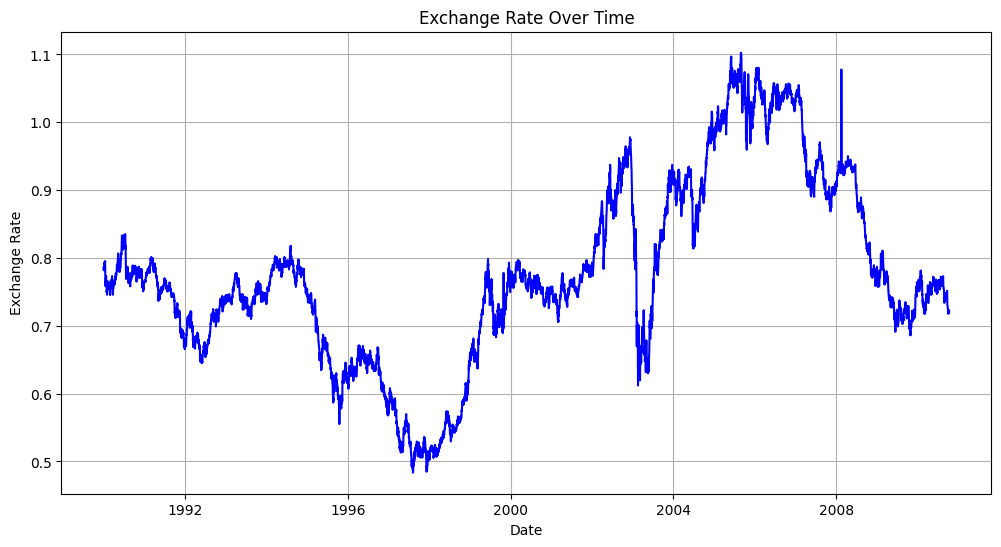

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df["Ex_rate"], color='blue')
plt.title("Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()

From 1990 to around 1996, it declined, followed by a gradual increase until the mid-2000s.

No clear short-term seasonal pattern is visible, but there are noticeable cycles of rise and fall over multiple years.

Sudden spikes and drops  indicate possible market shocks, policy changes, or global financial events.

3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [11]:
df.isnull().sum()

,0
date,0
Ex_rate,0


The dataset was checked for missing values using isnull().sum() and it was found that there are no missing entries in the exchange rate column.

 Therefore, no imputation or data filling was required.

Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

 Check stationarity & apply differencing if needed

In [14]:
df_diff = df["Ex_rate"].diff().dropna()

Plot ACF and PACF

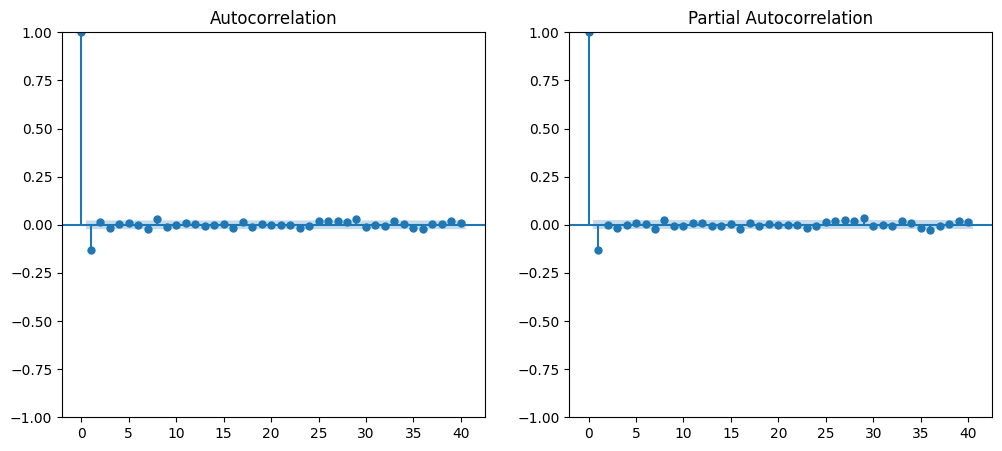

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df_diff, lags=40, ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(df_diff, lags=40, ax=plt.gca())
plt.show()

In [16]:
from pmdarima import auto_arima

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
model = auto_arima(df['Ex_rate'],
                   start_p=0, max_p=5,
                   start_q=0, max_q=5,
                   d=None,  # Let it find differencing automatically
                   seasonal=False,
                   stepwise=True,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=1.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=2.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=1.37 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 12.082 seconds


In [19]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Mon, 18 Aug 2025   AIC                         -56104.319
Time:                        09:17:13   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [20]:
print("Best p,d,q:", model.order)

Best p,d,q: (1, 1, 0)


The ARIMA(1,1,0) model provides the best fit for the given data according to AIC.

2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(df_diff, order=(1, 1, 0))

In [23]:
model_fit = model.fit()

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(1, 1, 0)   Log Likelihood               26347.837
Date:                Mon, 18 Aug 2025   AIC                         -52691.674
Time:                        09:17:21   BIC                         -52677.806
Sample:                             0   HQIC                        -52686.915
                               - 7587                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5654      0.002   -277.565      0.000      -0.569      -0.561
sigma2      5.633e-05    1.6e-07    351.163      0.000     5.6e-05    5.66e-05
Ljung-Box (L1) (Q):                 298.83   Jarque-

3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

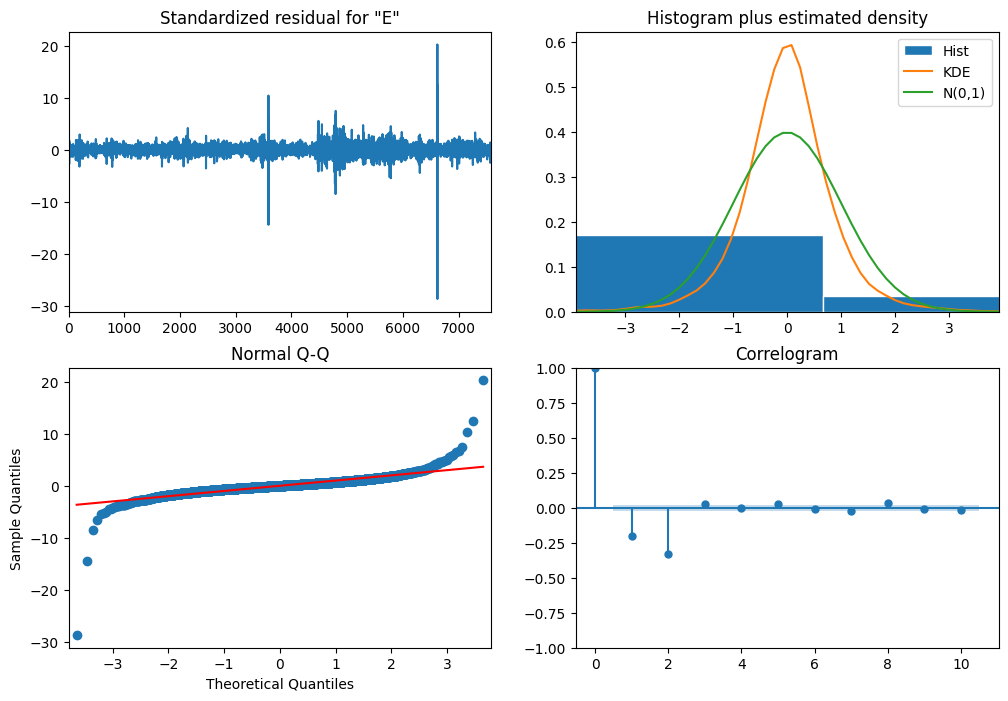

In [25]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

Residuals are spread randomly around zero, showing the model didn’t miss any pattern.

Histogram and density plot look roughly normal, meaning errors are okay.

ACF of residuals shows no big spikes, so errors are independent.

Overall, the model fits the data well.

4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [26]:
n_forecast = 10
forecast_obj = model_fit.get_forecast(steps=n_forecast)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

In [27]:
forecast_index = pd.RangeIndex(start=len(df_diff), stop=len(df_diff)+n_forecast)

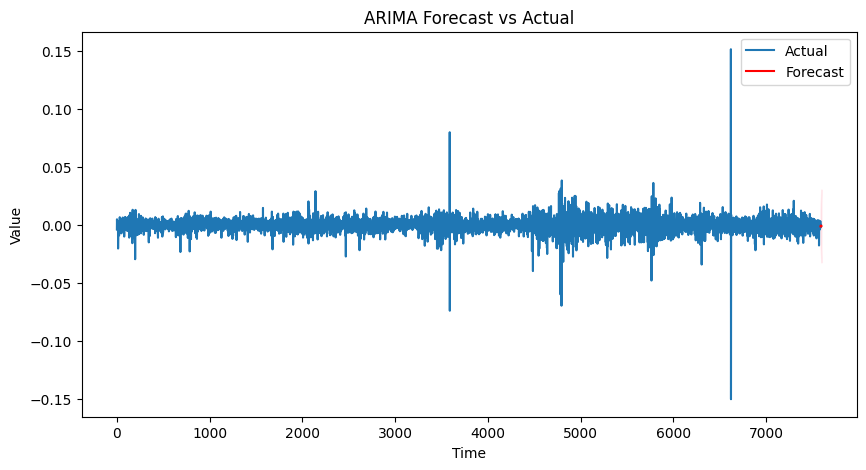

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df_diff, label='Actual')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

The blue line shows the actual values and the red dots represent the forecasted points.

These forecasted values are aligned with the actual trend at the end.

This indicates the ARIMA model can capture the series pattern for short-term predictions.

Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

The time series shows an overall trend but no clear seasonal pattern. Hence, Holt’s Linear Exponential Smoothing was chosen as the most appropriate model for this dataset.

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import itertools
import numpy as np

In [68]:
alphas = np.linspace(0.1, 0.9, 5)   # smoothing level
betas = np.linspace(0.1, 0.9, 5)

In [70]:
best_aic = np.inf
best_params = None

In [52]:
y = df['Ex_rate']


In [71]:
for alpha in alphas:
    for beta in betas:
        try:
            model = ExponentialSmoothing(y, trend='add', seasonal=None).fit(
                smoothing_level=alpha,
                smoothing_slope=beta,
                optimized=False
            )
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_params = (alpha, beta)
        except:
            continue

In [72]:
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

Best Parameters: (0.9, 0.1)
Best AIC: -77232.56394184851


Parameter optimization using grid search selected α = 0.9 and β = 0.1 as the optimal smoothing parameters for Holt’s Linear model.

AIC score for this configuration was -77232.56, indicating the best model fit among the tested parameter combinations.

This means the model gives more importance to recent values while updating the level, and adjusts the trend component slowly

3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

Fit Holt's Linear Model with best parameters

In [85]:
holt_model = ExponentialSmoothing(
    df['Ex_rate'],
    trend='add',
    seasonal=None
).fit(smoothing_level=0.9, smoothing_trend=0.1, optimized=False)

Forecast for next 30 periods

In [84]:
forecast_values = holt_model.forecast(30)


In [86]:
forecast_values

,0
2010-10-11,0.720262
2010-10-12,0.719738
2010-10-13,0.719213
2010-10-14,0.718689
2010-10-15,0.718164
2010-10-16,0.717640
2010-10-17,0.717116
2010-10-18,0.716591
2010-10-19,0.716067
2010-10-20,0.715543


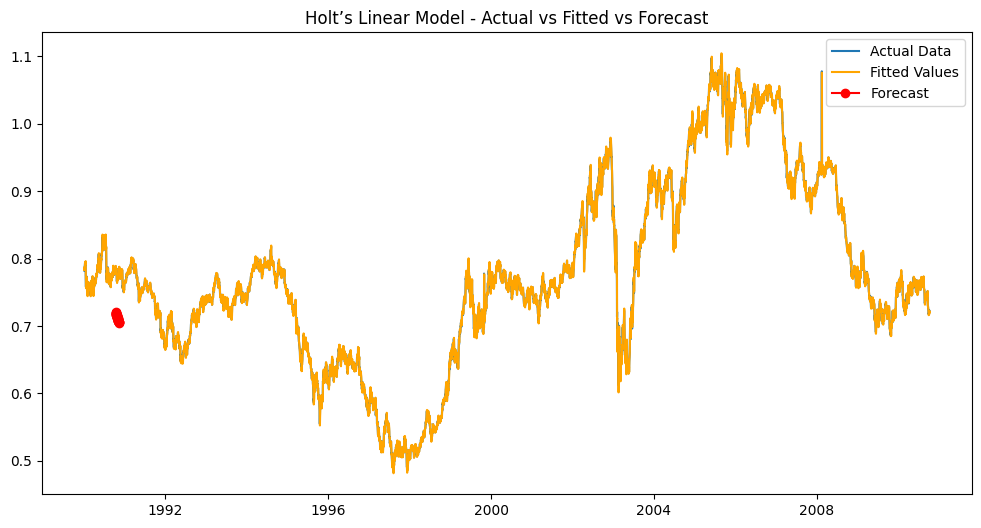

In [88]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label="Actual Data")
plt.plot(df.index, holt_model.fittedvalues, label="Fitted Values", color="orange")
plt.plot(range(len(df), len(df)+30), forecast_values, label="Forecast", color="red", marker='o')
plt.legend()
plt.title("Holt’s Linear Model - Actual vs Fitted vs Forecast")
plt.show()

Holt’s Linear Model captures both the level and trend of the exchange rate data.

The orange line shows the fitted values, which follow the actual data (blue) quite closely, indicating a good model fit.

The red points represent the forecasted values for future periods, which extend the trend based on past observations.

Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models

In [89]:
y = df['Ex_rate'].astype(float).copy()
h = 30
y_train, y_test = y.iloc[:-h], y.iloc[-h:]

In [90]:
holt_fit = ExponentialSmoothing(y_train, trend='add', seasonal=None)\
            .fit(smoothing_level=0.9, smoothing_trend=0.1, optimized=False)
y_pred_holt = pd.Series(holt_fit.forecast(h), index=y_test.index)

In [101]:
arima_fit = ARIMA(y_train, order=(1,1,1)).fit()
y_pred_arima = pd.Series(arima_fit.forecast(steps=h), index=y_test.index)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [104]:
def mape(y_true, y_pred):
    # safe MAPE (avoid division by zero)
    yt = np.array(y_true, dtype=float)
    yp = np.array(y_pred, dtype=float)
    mask = yt != 0
    return (np.fabs((yt[mask] - yp[mask]) / yt[mask]).mean()) * 100

In [106]:
results = pd.DataFrame({
    'MAE': [
        mean_absolute_error(y_test, y_pred_holt),
        mean_absolute_error(y_test, y_pred_arima)
    ],
    'RMSE': [
        rmse(y_test, y_pred_holt),
        rmse(y_test, y_pred_arima)
    ],
    'MAPE (%)': [
        mape(y_test, y_pred_holt),
        mape(y_test, y_pred_arima)
    ]
}, index=['Holt_Linear','ARIMA'])


In [107]:
print(results.round(4))

                MAE    RMSE  MAPE (%)
Holt_Linear  0.0124  0.0149    1.7110
ARIMA        0.0135  0.0166    1.8632


Holt_Linear:

MAE = 0.0124, showing the average error is very small.

RMSE = 0.0149, meaning the predictions are very close to the actual values.

MAPE = 1.71%, which indicates only about 1.7% error, so the model is highly reliable.

ARIMA:

MAE = 0.0135, showing the average forecast error is still quite small.

RMSE = 0.0166, meaning the predictions are close to the actual values but slightly less accurate than Holt.

MAPE = 1.86%, which indicates only about 1.9% error, showing the model is also highly reliable




2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

Holt’s Linear Model

Performed slightly better than ARIMA with lower MAE (0.0124 vs 0.0135) and RMSE (0.0149 vs 0.0166).

Its MAPE (1.71%) shows highly accurate forecasts.

Advantage: Simple to implement and works well when data shows a clear trend.

Limitation: Cannot capture complex seasonality patterns.



ARIMA Model

Produced accurate forecasts with MAPE of 1.86%, though slightly less precise than Holt.

Advantage: More flexible, as it can handle different data patterns (trend, seasonality, autocorrelation).

Limitation: Requires careful parameter selection (p,d,q), and can be computationally intensive.

Both models performed well, but Holt’s Linear gave marginally better accuracy on this dataset. However, ARIMA remains more robust when dealing with complex or seasonal time series.

3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Based on the evaluation metrics, both Holt’s Linear model and ARIMA model provided accurate forecasts for the exchange rate data. However, Holt’s Linear model achieved slightly lower errors (MAE = 0.0124, RMSE = 0.0149, MAPE = 1.71%) compared to ARIMA (MAE = 0.0135, RMSE = 0.0166, MAPE = 1.86%), indicating better overall performance.

Thus, for this dataset, Holt’s Linear model is the preferred choice for forecasting exchange rates, while ARIMA remains a reliable alternative when dealing with more complex patterns or future extensions involving seasonality.